Import necessary libraries

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import matplotlib.pyplot as plt
import numpy as np

Load the MNIST dataset

In [65]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [66]:
#Normalize the data (scale pixel values to the range [0, 1])
x_train = x_train / 255.0
x_test = x_test / 255.0

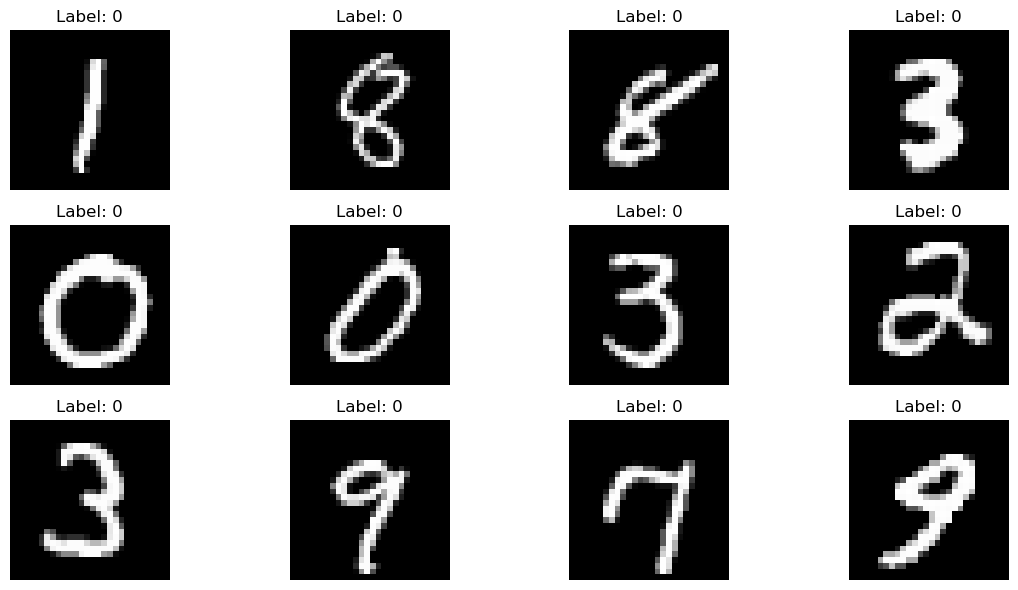

In [67]:
#Function to display random images from the dataset with true labels
def display_random_images(images, labels, num_images=12):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(3, 4, i + 1)
        random_index = np.random.randint(0, images.shape[0])  # Choose a random index from the dataset
        plt.imshow(images[random_index], cmap='gray')  # Display the image in grayscale
        plt.title(f"Label: {np.argmax(labels[random_index])}")  # Display the true label
        plt.axis('off')  # Hide axis ticks
    plt.tight_layout()  # Adjust layout to avoid overlapping
    plt.show()

# Display random images from the training set
display_random_images(x_train, y_train, num_images=12)


In [68]:
#One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [69]:
#Build the neural network model with Dropout and Batch Normalization
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D vector
    layers.Dense(256, activation='relu'),  # First hidden layer with ReLU activation
    layers.BatchNormalization(),  # Add Batch Normalization to stabilize training
    layers.Dropout(0.4),  # Apply 40% dropout to reduce overfitting
    layers.Dense(128, activation='relu'),  # Second hidden layer
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.Dropout(0.3),  # Apply 30% dropout
    layers.Dense(10, activation='softmax')  # Output layer with softmax for classification
])

In [70]:
#Compile the model with a custom learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
#Add Early Stopping to stop training if validation loss stops improving
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [72]:
#Train the model and store the training history
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.1, callbacks=[early_stopping])


Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8216 - loss: 0.5783 - val_accuracy: 0.9665 - val_loss: 0.1159
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9380 - loss: 0.2088 - val_accuracy: 0.9727 - val_loss: 0.0925
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9494 - loss: 0.1641 - val_accuracy: 0.9727 - val_loss: 0.0869
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9570 - loss: 0.1378 - val_accuracy: 0.9760 - val_loss: 0.0764
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9608 - loss: 0.1243 - val_accuracy: 0.9785 - val_loss: 0.0705
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9646 - loss: 0.1098 - val_accuracy: 0.9775 - val_loss: 0.0754
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9676 - loss: 0.1034 - val_accuracy: 0.9788 - val_loss: 0.0715
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9685 - loss: 0.0953 - val_accuracy: 0.

In [73]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0815
Test accuracy: 0.9783999919891357


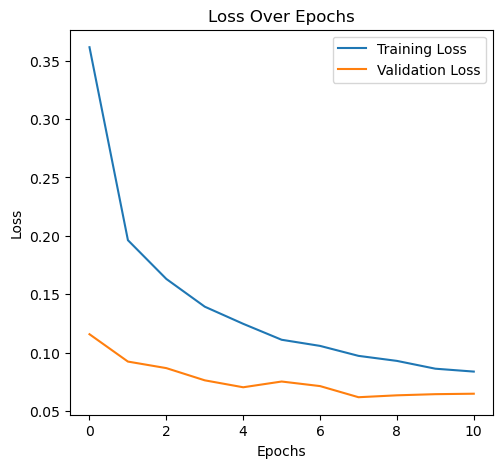

In [74]:
# Plot training and validation loss over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

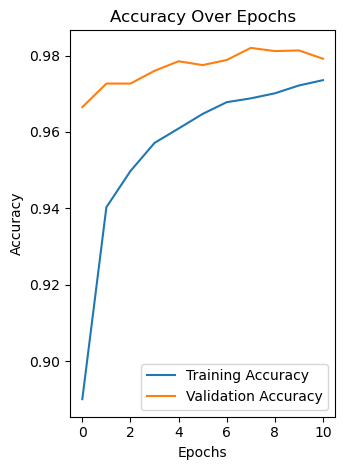

In [75]:
# Plot training and validation accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [76]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


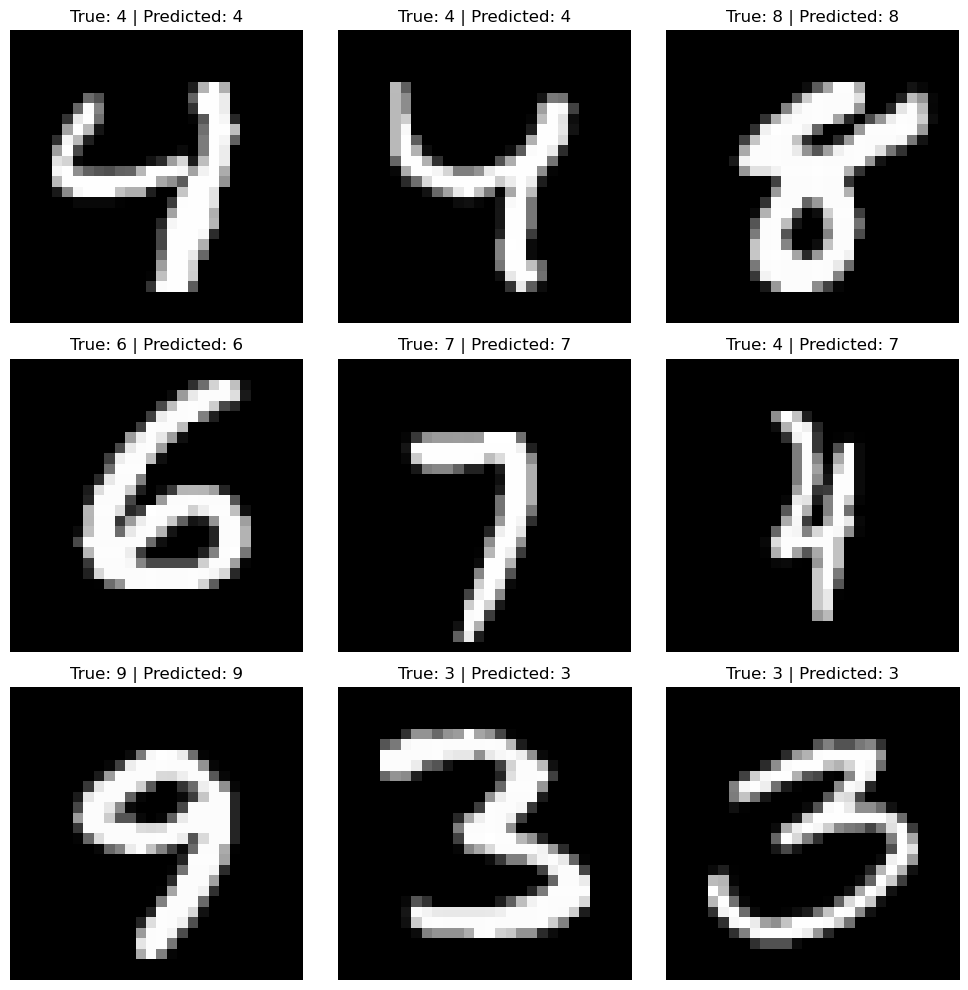

In [77]:
# Display some test images with predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    random_index = np.random.randint(0, x_test.shape[0])
    plt.imshow(x_test[random_index], cmap='gray')
    plt.title(f"True: {np.argmax(y_test[random_index])} | Predicted: {predictions[random_index].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()